<a href="https://www.kaggle.com/code/doghousesam/movie-data-analysis?scriptVersionId=166668441" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing libraries and setting styles...

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sns
plt.style.use('ggplot')
import numpy as np
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv("/kaggle/input/movies/movies.csv")


# First, let's find out some basic facts from our movie dataset!
* Highest Budget
* Highest Gross
* Highest + Lowest Votes 

In [3]:
budget_sorted = df.sort_values(by = "budget", ascending = False)
highest_budget = budget_sorted["name"].iloc[0]
print(f"The movie with the highest budget was {highest_budget}")

The movie with the highest budget was Avengers: Endgame


In [4]:
gross_sorted = df.sort_values(by = "gross", ascending = False)
highest_gross = gross_sorted["name"].iloc[0]
print(f"The movie with the highest gross earnings was {highest_gross}")

The movie with the highest gross earnings was Avatar


In [5]:
votes_sorted = df.sort_values(by = "votes", ascending = False)
highest_votes = votes_sorted["name"].iloc[0]
lowest_votes = votes_sorted["name"].iloc[-1]
print(f"The movie with the highest votes was {highest_votes}")
print(f"The movie with the lowest votes was {lowest_votes}")


The movie with the highest votes was The Dark Knight
The movie with the lowest votes was It's Just Us


# Checking for missing data

In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

# Dropping missing values so we can change data type ~

In [8]:
non_finite_budget = df[df["budget"].isna()]
non_finite_gross = df[df["budget"].isna()]
df.dropna(subset=["budget"], inplace = True)
df.dropna(subset=["gross"], inplace= True)
df["budget"] = df["budget"].astype("int64")
df["gross"] = df["gross"].astype("int64")

# Extracting the year from 'released' column 
error in dataset unclear why seperate year and released columns, I chose to use released column for analysis

In [9]:
df["year_released"] = df["released"].str.extract(r'(\d{4})')

In [10]:
df.sort_values(by = ["gross"], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


# First examining relationship between movie budget and gross profit

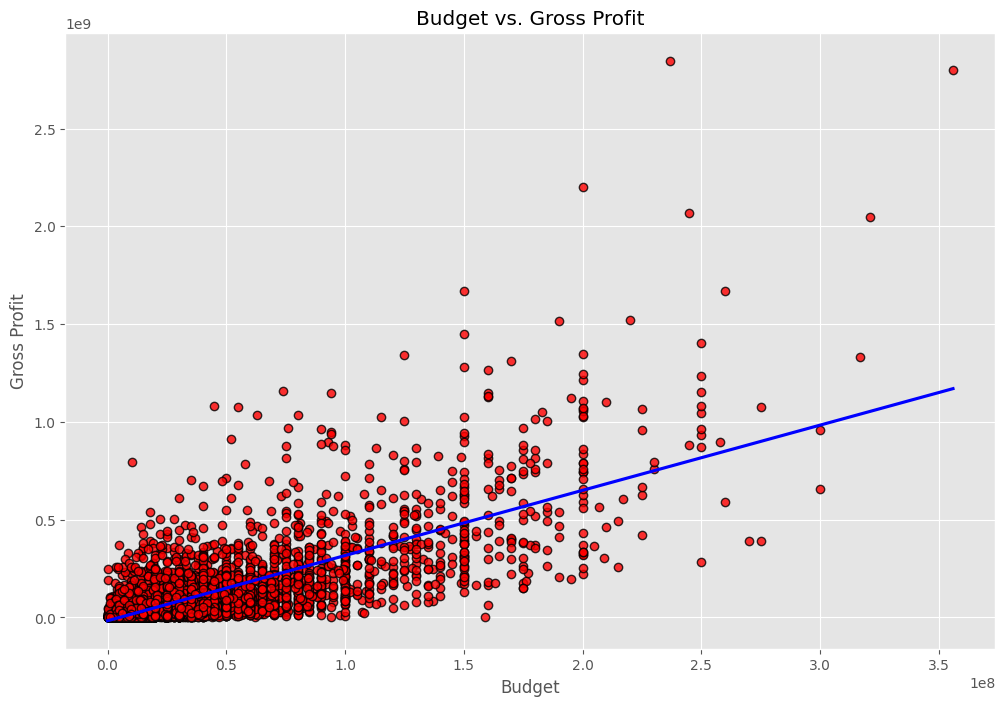

In [11]:
sns.regplot(data = df, x = "budget", y = "gross", ci = None, scatter_kws = {"color": "red", "edgecolor": "black"}, line_kws={"color":"blue"})
plt.title("Budget vs. Gross Profit")
plt.xlabel("Budget")
plt.ylabel("Gross Profit")
plt.show()

In [12]:
correlation = pearsonr(df["budget"], df["gross"])
print(correlation)

PearsonRResult(statistic=0.7403948929894828, pvalue=0.0)


# Making a correlaiton matrix of numerical columns

In [13]:
new_df = df
for col_name in new_df.columns:
    if(new_df[col_name].dtype == "object"):
        new_df[col_name] = new_df[col_name].astype('category')
        new_df[col_name] = new_df[col_name].cat.codes

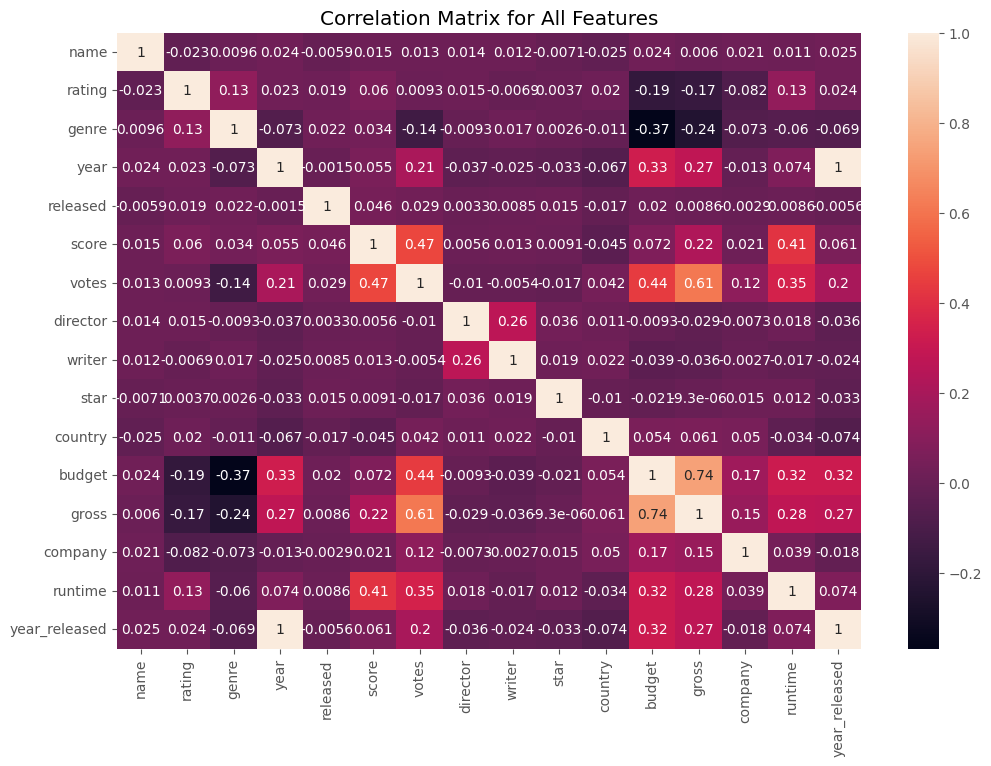

In [14]:
correlation_new = new_df.corr(method = "pearson")
sns.heatmap(correlation_new, annot=True)
plt.title("Correlation Matrix for All Features")
plt.show()

In [15]:
correlation_mat = new_df.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr_pairs = sorted_pairs[(sorted_pairs) >0.5]

# Found also a strong correlation between votes + (budget/gross)

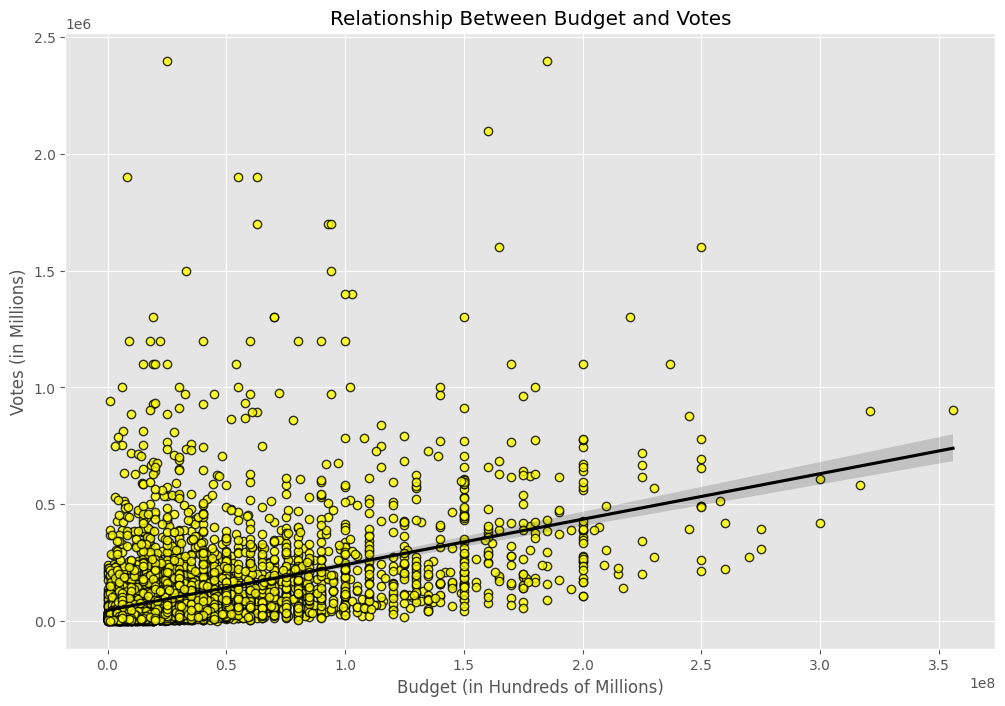

In [16]:
votes_budget = sns.regplot(data = df, x = "budget", y = "votes", scatter_kws = {"color":"yellow", "edgecolor":"black"}, line_kws = {"color":"black"})
plt.xlabel("Budget (in Hundreds of Millions)")
plt.ylabel("Votes (in Millions)")
plt.title("Relationship Between Budget and Votes")
plt.show()